In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
train_df = pd.read_csv('../../2_variant_autism_prediction/input/train.csv')
test_df = pd.read_csv('../../2_variant_autism_prediction/input/test.csv')

In [3]:
train_df.shape, test_df.shape

((800, 22), (200, 21))

In [4]:
train_df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [5]:
train_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [6]:
# Identify the target column
[x for x in train_df.columns if x not in test_df.columns]

['Class/ASD']

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:
# Function to extract the categorical columns and numerical columns in separate list for ease of EDA
def get_num_cat_cols(df):

    num_cls = [x for x in df.columns if df[x].dtype != 'object']
    cat_cls = [x for x in df.columns if x not in num_cls]

    print(f'Numerical columns \n',num_cls)
    print(f'Categorical columns \n',cat_cls)

    return num_cls, cat_cls

In [9]:
num_cols, cat_cols = get_num_cat_cols(train_df)

Numerical columns 
 ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']
Categorical columns 
 ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']


In [10]:
# Descriptive statistics for numerical columns
train_df[num_cols].describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


Inference

Columns - A1_Score to A10_Score has value either 0 or 1, to be considered as binary variable
Age starts from min 2 yrs to max 89 yrs with median value in 24.8 yrs and average value in 28.45 yrs
Result value ranges from -6.13 to +15.85
Target column indicates there is 20% have Autism and 80% dont have autism

In [11]:
train_df['relation'] = train_df['relation'].replace('?','Other')
train_df['ethnicity'] = train_df['ethnicity'].replace('?','other')

test_df['relation'] = test_df['relation'].replace('?','Other')
test_df['ethnicity'] = test_df['ethnicity'].replace('?','other')

In [12]:
# checking the value in test data, to drop the column in both train and test dataset
test_df['age_desc'].value_counts()

18 and more    200
Name: age_desc, dtype: int64

In [13]:
train_df.drop('age_desc',axis=1,inplace=True)
test_df.drop('age_desc',axis=1,inplace=True)

In [14]:
# Recreating the numerical and categorical columns list
num_cols, cat_cols = get_num_cat_cols(train_df)

Numerical columns 
 ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']
Categorical columns 
 ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']


In [15]:
# Moving the binary variables in numerical columns to categorical columns list, for EDA
cat_cols = cat_cols + [x for x in num_cols if '_Score' in x]
print(cat_cols)
num_cols = [x for x in num_cols if x not in cat_cols]
print(num_cols)

['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
['ID', 'age', 'result', 'Class/ASD']


<AxesSubplot:xlabel='Class/ASD', ylabel='age'>

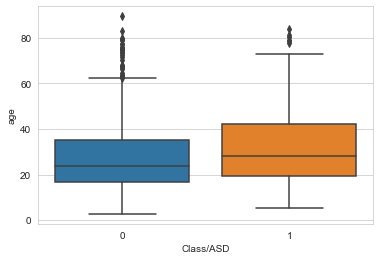

In [16]:
# Feature - age
sns.boxplot(x = train_df['Class/ASD'], y = train_df['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

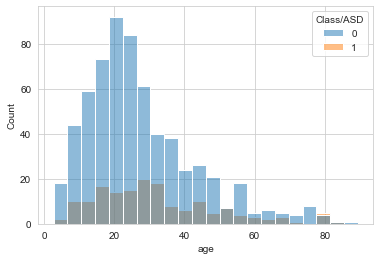

In [17]:
# Inference
#
# Median Age of persons having autism is more than who dont have
# Range for both values of target class is same, thus age cannot be good classifier of target classm below histogram indicates the same

sns.histplot(x = train_df['age'], hue = train_df['Class/ASD'])

<AxesSubplot:xlabel='Class/ASD', ylabel='result'>

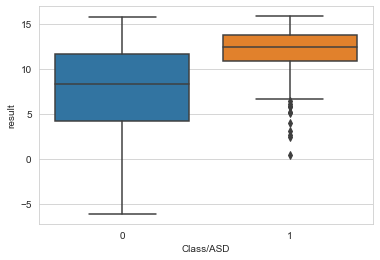

In [18]:
# Feature - result
sns.boxplot(x = train_df['Class/ASD'], y = train_df['result'])

<AxesSubplot:xlabel='result', ylabel='Count'>

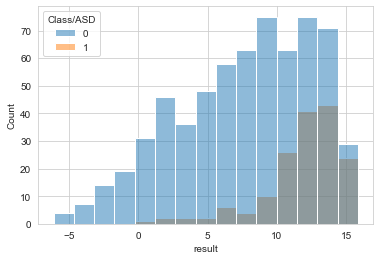

In [19]:
# Inference
#
# Median result of persons having autism is more than who dont have
# Range of result data for person having autism is shorter and higher when compared to person not having autism, this is could be potential classifier of target class

sns.histplot(x = train_df['result'], hue = train_df['Class/ASD'])

In [20]:
# Function to conduct chi square test between categorical feature and target feature
def chi_sq_test(ct):
    # input crosstab of 2 categorical variables
    stat, p, dof, expected = chi2_contingency(ct)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Both variables are Dependent (reject H0)')
    else:
        print('Both variables are Independent (H0 holds true)')

In [21]:
# Function to plot stacked bar graph between categorical feature and target variable,
# also helps us know the dependent variable using chisquare function - this step is feature selection
def cat_col_test(df, cat_colname, target_colname):

    print(f"Column name - {cat_colname}")
    ct = pd.crosstab(df[cat_colname],df[target_colname])
    chi_sq_test(ct)
    ax = ct.plot(kind='bar',stacked=True, rot = 45)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    plt.show()

Column name - gender
p value is 0.9758243168741388
Both variables are Independent (H0 holds true)


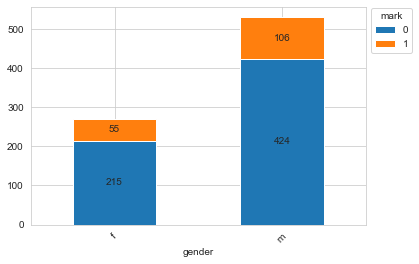

Column name - ethnicity
p value is 6.321928228170239e-33
Both variables are Dependent (reject H0)


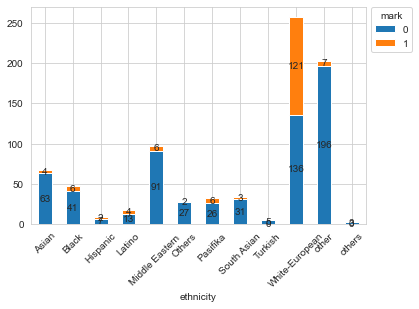

Column name - jaundice
p value is 0.00013300658957470307
Both variables are Dependent (reject H0)


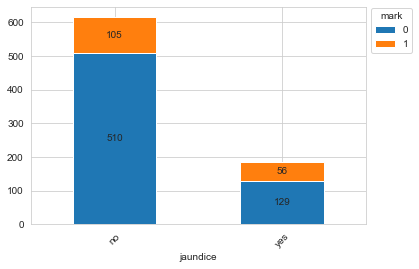

Column name - austim
p value is 1.0060560058593027e-23
Both variables are Dependent (reject H0)


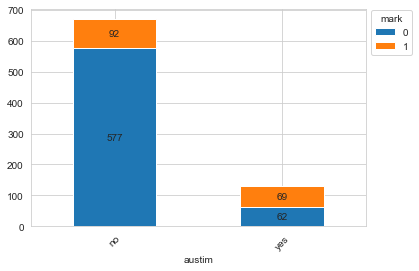

Column name - contry_of_res
p value is 2.8611111937550227e-19
Both variables are Dependent (reject H0)


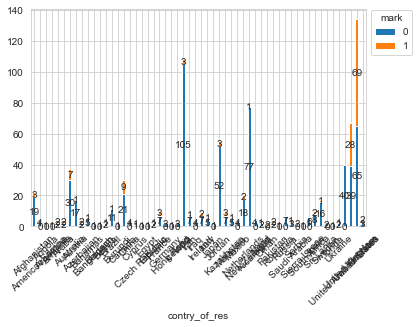

Column name - used_app_before
p value is 0.3745543476430917
Both variables are Independent (H0 holds true)


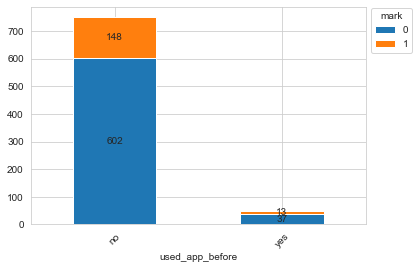

Column name - relation
p value is 0.0608119481637184
Both variables are Independent (H0 holds true)


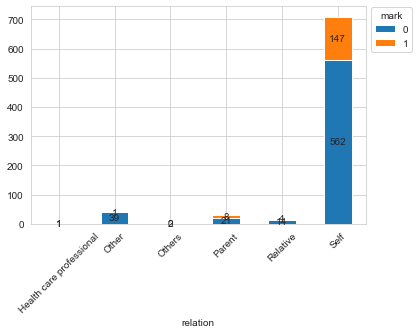

Column name - A1_Score
p value is 4.104487536920418e-17
Both variables are Dependent (reject H0)


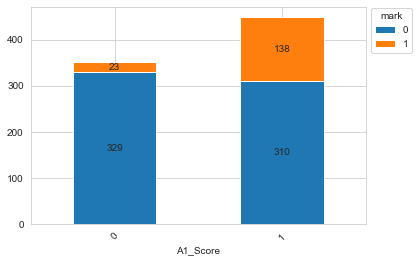

Column name - A2_Score
p value is 1.3998012922364413e-25
Both variables are Dependent (reject H0)


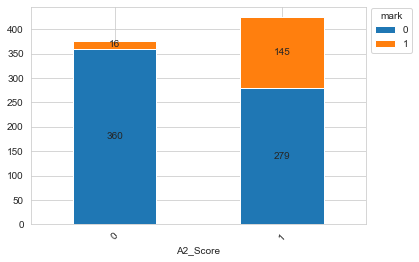

Column name - A3_Score
p value is 2.4007562062687566e-38
Both variables are Dependent (reject H0)


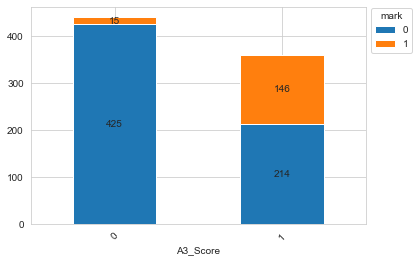

Column name - A4_Score
p value is 4.8840206399536454e-45
Both variables are Dependent (reject H0)


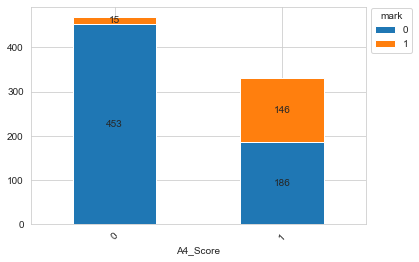

Column name - A5_Score
p value is 1.7931000962761736e-38
Both variables are Dependent (reject H0)


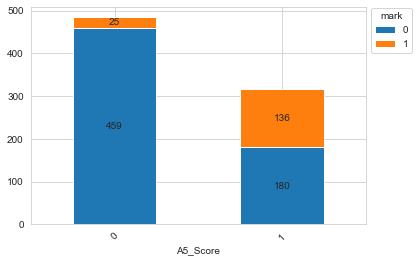

Column name - A6_Score
p value is 1.3536803601031668e-52
Both variables are Dependent (reject H0)


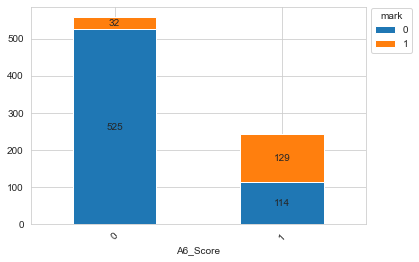

Column name - A7_Score
p value is 5.621312869749746e-37
Both variables are Dependent (reject H0)


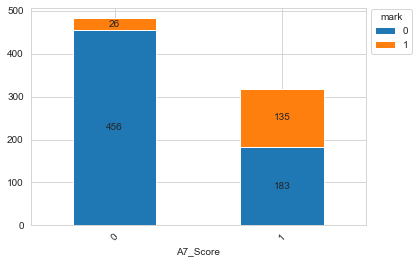

Column name - A8_Score
p value is 2.181610421234002e-18
Both variables are Dependent (reject H0)


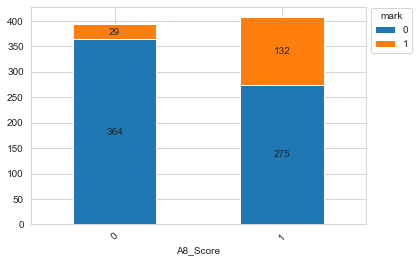

Column name - A9_Score
p value is 9.762852300543611e-39
Both variables are Dependent (reject H0)


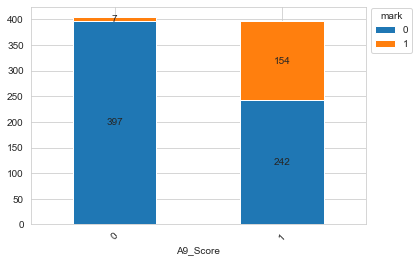

Column name - A10_Score
p value is 5.880205552224773e-22
Both variables are Dependent (reject H0)


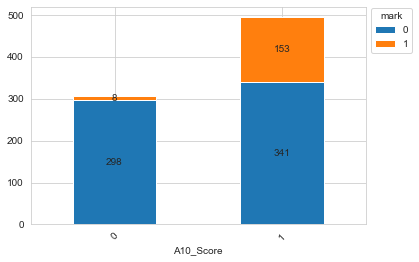

In [22]:
for c in cat_cols:
    cat_col_test(train_df, c, 'Class/ASD')

In [23]:
# Inference
#
# used_app_before, gender are independent from target variable, in chisquare test. Hence, dropping these variable for model building stage.

train_df.drop(['used_app_before','gender'],axis=1,inplace=True)
test_df.drop(['used_app_before','gender'],axis=1,inplace=True)

In [24]:
train_df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'result',
       'relation', 'Class/ASD'],
      dtype='object')

In [25]:
# one hot encoding for categorical variables with only 2 unique values
train_df['jaundice'] = np.where(train_df['jaundice'] == 'yes',1,0)
test_df['jaundice'] = np.where(test_df['jaundice'] == 'yes',1,0)

train_df['austim'] = np.where(train_df['austim'] == 'yes',1,0)
test_df['austim'] = np.where(test_df['austim'] == 'yes',1,0)

In [26]:
# Label encoding based on frequency values of categorical variable
dict_ethnicity = dict(zip(train_df['ethnicity'].value_counts().index, range(1,train_df['ethnicity'].nunique()+1)))
dict_ethnicity

{'White-European': 1,
 'other': 2,
 'Middle Eastern ': 3,
 'Asian': 4,
 'Black': 5,
 'South Asian': 6,
 'Pasifika': 7,
 'Others': 8,
 'Latino': 9,
 'Hispanic': 10,
 'Turkish': 11,
 'others': 12}

In [27]:
train_df['ethnicity'] = train_df['ethnicity'].map(dict_ethnicity)
test_df['ethnicity'] = test_df['ethnicity'].map(dict_ethnicity)

In [28]:
col_name = 'contry_of_res'
dict_country = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
train_df[col_name] = train_df[col_name].map(dict_country)
test_df[col_name] = test_df[col_name].map(dict_country)

In [29]:
col_name = 'relation'
dict_relation = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
train_df[col_name] = train_df[col_name].map(dict_relation)
test_df[col_name] = test_df[col_name].map(dict_relation)

In [30]:
train_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jaundice,austim,contry_of_res,result,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,2,0,0,11,6.351166,1,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,2,0,0,2,2.255185,1,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,1,0,1,1,14.851484,1,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,2,0,0,1,2.276617,1,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,2,0,0,20,-4.777286,1,0


In [31]:
test_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jaundice,austim,contry_of_res,result,relation
0,1,1,1,0,0,1,1,0,0,1,1,15.599481,1,1,0,2.0,12.399055,1
1,2,1,0,0,0,0,0,0,1,0,0,27.181099,4,0,0,27.0,6.551598,1
2,3,1,1,1,0,1,1,0,1,1,1,31.643906,1,1,0,49.0,3.180663,1
3,4,0,0,0,0,0,0,0,0,0,0,25.369210,2,0,0,2.0,2.220766,1
4,5,0,0,0,1,0,0,0,0,0,0,9.078580,2,0,0,21.0,7.252028,1


In [33]:
train_df.isnull().sum()

ID               0
A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
ethnicity        0
jaundice         0
austim           0
contry_of_res    0
result           0
relation         0
Class/ASD        0
dtype: int64

In [34]:
test_df.isnull().sum()

ID               0
A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
ethnicity        0
jaundice         0
austim           0
contry_of_res    0
result           0
relation         0
dtype: int64

In [32]:
test_df['contry_of_res'].fillna(1.0,inplace=True)

In [35]:
X = train_df.drop(['ID','Class/ASD'],axis=1)
y = train_df['Class/ASD']

X.shape, y.shape

((800, 17), (800,))

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [37]:
seed = 42
model1 = LogisticRegression(max_iter = 500)
model2 = SVC(random_state = seed)
model3 = GaussianNB()
model4 = MLPClassifier(random_state = seed,max_iter=500)
model5 = SGDClassifier(random_state = seed)
model6 = KNeighborsClassifier()
model7 = DecisionTreeClassifier(random_state = seed)
model8 = RandomForestClassifier(random_state = seed,class_weight="balanced")
model9 = GradientBoostingClassifier(random_state = seed)
model10 = LGBMClassifier(random_state = seed)
model11 = XGBClassifier(random_state = seed,use_label_encoder=False)

In [38]:
from sklearn.model_selection import cross_val_score

models = [model1,model2,model3,model4,model5,model6,model7,
          model8,model9,model10,model11]


for m in range(len(models)):
    model = models[m]
    scores = cross_val_score(model, X, y, scoring = 'roc_auc', cv = 5)
    print(f"For no of trees {m+1} - {np.mean(scores)}")

For no of trees 1 - 0.906768631349171
For no of trees 2 - 0.8653651891702457
For no of trees 3 - 0.9093963674018731
For no of trees 4 - 0.8922494351735862
For no of trees 5 - 0.8778076346635647
For no of trees 6 - 0.7846263058115606
For no of trees 7 - 0.7161903856478167
For no of trees 8 - 0.9091483529158465
For no of trees 9 - 0.8989237773279051
For no of trees 10 - 0.8963080881091923
For no of trees 11 - 0.9012763818673944


In [39]:
# Creating weighted ensemble with top 3 algorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

kfold = 5
skf = StratifiedKFold(n_splits=kfold, shuffle = True)

X1 = np.array(X)
y1 = np.array(y)
scores = []

for i, (train_index, test_index) in enumerate(skf.split(X1, y1)):
    print('[Fold %d/%d]' % (i + 1, kfold))
    X_train, X_valid = X1[train_index], X1[test_index]
    y_train, y_valid = y1[train_index], y1[test_index]

    model1 = LogisticRegression(max_iter = 1000, C=1.0,penalty='l2',solver='newton-cg')
    model1.fit(X_train,y_train)
    y_pred1 = pd.DataFrame(model1.predict_proba(X_valid))[1].values

    model2 = RandomForestClassifier(random_state=123,class_weight="balanced")
    model2.fit(X_train,y_train)
    y_pred2 = pd.DataFrame(model2.predict_proba(X_valid))[1].values

    model3 = GaussianNB()
    model3.fit(X_train,y_train)
    y_pred3 = pd.DataFrame(model3.predict_proba(X_valid))[1].values

    y_pred = 0.2 * y_pred1 + 0.15 * y_pred2 + 0.65*y_pred3
    score = roc_auc_score(y_valid, y_pred)
    y_pred_label = np.where(y_pred<0.5,0,1)
    #print(classification_report(y_valid,y_pred_label))
    scores.append(score)

    print(f'Fold {i + 1}/{kfold} - Score: {score}')

print(f"Avg scores - {np.mean(scores)}")

[Fold 1/5]
Fold 1/5 - Score: 0.92578125
[Fold 2/5]
Fold 2/5 - Score: 0.92333984375
[Fold 3/5]
Fold 3/5 - Score: 0.94091796875
[Fold 4/5]
Fold 4/5 - Score: 0.8994140625
[Fold 5/5]
Fold 5/5 - Score: 0.8816511572417084
Avg scores - 0.9142208564483416
